In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd drive/MyDrive/Soft-computing-tweet-summarization-analysis

/content/drive/MyDrive/Soft-computing-tweet-summarization-analysis


# PERFORMANCE EVALUATION

**A. Intrinsic Evaluation** — Focuses on intermediary objectives (i.e. the performance of an NLP component on a defined subtask)

**B. Extrinsic Evaluation** — Focuses on the performance of the final objective (i.e. the performance of the component on the complete application)

---
Stakeholders typically care about extrinsic evaluation since they’d want to know how good the model is at solving the business problem at hand. However, it’s still important to have intrinsic evaluation metrics in order for the AI team to measure how they are doing.

Researchers must understand beforehand how comparable the human-generated and generated summaries are.

### A. INTRINSIC EVALUATION 
Intrinsic evaluation compares machine-generated and human-generated summaries to judge based on two factors: quality and information. Human experts may be required to evaluate machine-generated summaries utilizing several quality measures.
- Readability, 
- non-redundancy, 
- structure, 
- coherence, 
- referential clarity, 
- conciseness 
- focus, and 
- content coverage, etc.

The basic measures for intrinsically evaluating summaries are: 
- precision, 
- recall, 
- F-measure, and 
- [others.](https://towardsdatascience.com/the-most-common-evaluation-metrics-in-nlp-ced6a763ac8b)

In [ ]:
#@title 1. Recall Metric
#@markdown Recall measures the probability of the summary being relevant to the sample, or the ability of the model to recall all information from the reference.

#@markdown \begin{align} recall = \frac{S _{ref}\;\cap\;S_{model}}{S_{ref}} \end{align}



In [ ]:
#@title 2. Precision Metric
#@markdown Precision measures the ability of the model to gather information from the source. A summary containing all words in the reference has perfect recall but it may not contain anything extra.

#@markdown \begin{align}precision = \frac{S _{ref}\;\cap\;S_{model}}{S_{model}}\end{align}



In [ ]:
#@title 3. F-Score
#@markdown Precision and Recall are complementary metrics that have an inverse relationship. A summary with high precision may not be relevant to the reference. F-score measures the arithmetic mean of precision and recall. That gives us a reliable measure of our model performance that relies not only on the model capturing as many words as possible (recall) but doing so without outputting irrelevant words (precision).

#@markdown \begin{align} f{-}measure = \frac{2(precision)(recall)}{precision + recall} \end{align}



### B. EXTRINSIC EVALUATION 
Extrinsic evaluation is a sentence-based quality evaluation of summaries. It measures how good the summary is for: 
- text categorization, 
- information retrieval, and 
- question responding.

However, it only provides results based on individual sentences, not whole summary, but we can **consider an average of all sentences** in the summary. There are numerous approaches to extrinsic evaluation. 
- Relevance assessment determines whether the text is relevant to the topic.
- Reading comprehension determines whether it can answer multiple-choice assessments or not.

The most commonly used extrinsix evaluation is the ROUGE metric.

#### Recall-Oriented Understudy for Gisting Evaluation (ROUGE) 
ROUGE is a series of evaluations ATS and machine translation. It compares an automatically generated summary or translation to a set of predetermined summaries such as human-generated summaries. We have **ROUGE-N, ROUGE-L, ROUGE-W, ROUGE-S**, and their variants. ROUGE-N and ROUGE-L are the most widely used, owing to simplicity, but ROUGE-SU4 has been shown to best approximate human-assigned scores of summaries.

**Drawbacks**<br>
ROUGE is a syntactical measure, not semantic. So, for very two different sequences that have the same meaning will get a low ROUGE score. This can be offset by using several references and taking the average score, or by upgrading the token-matching step with a synonym look-up table.
It does not make any provision to cater for the readability
or fluency of the generated summaries.

In [ ]:
#@title model & reference summaries
model = ['''global cues strong dow fut 150 pts investors weighing updates covid19 
          vaccine rollout well coronavirus stimulus stalemate washington japan 176 pts 
          hangseng 16 pts sgx nifty 48 pts brent crude hovers 50. sir please delay boards 
          able study situation online classes waste tuition due covid19 hence question 
          self study sir delay bords asking promotion without exam please sir. reports 
          27071 new cases 336 deaths last 24 hours india total cases rise 9884100 active 
          cases country stand 352586 covid death toll goes 143355. sir loan ony head 2 
          kids money even eat food bank people behind rent tough life ca nt see kids 
          stage please help lost job husband due covid one even call home please help 
          least pay loan.''',

          '''needs undertaken designated public health authority district rapid reaction 
          team rrt treating physician accordingly advice shall made regarding management 
          cases contacts need 34. clusters gt15 cases appear office essential principles 
          risk assessment isolation amp quarantine contacts case referral management 
          remain however scale arrangements higher either case risk assessment 24. 
          falling sick nt problem became covid mildhigh fever cold amp cough bound happen 
          thereafter depends immune system fast recover. due ongoing covid19 many tax 
          professionals across india covid positive requested kindly extend due date 
          gstr99c gst returns atleast 31032020. every state worked towards increasing 
          number covid tests tmc govt intentionally kept tests low hide reality deaths 
          11th dec 2020 west bengal stands 33rd position across states tests per million 
          count mere 65426. thermo king part irelandbased trane technologies made necessary 
          alterations added additional insulation adjusting refrigeration system tuna 
          shipping containers could get even colder.''',

          '''covid india samples testing 154566990 total december 13 2020 855157 december 
          13 2020 positivity today 316 amp till date 639 cases 9884100 today 27071. bb sir 
          aap jab covid hue tab apne aur apki family ne situation ko kaise tackle kiya abhi 
          bhi bht log hai jo covid ko srsly nahi le rahe hai aur bina kaam bahar ghum rahe 
          haiunke liye msg btw videos inspire us.
          313 lakh people paid rs 1841 crores fine wearing face masks public places ahmedabad 
          gujarat since outbreak covid19 1400 police personnel contracted covid19 amp 13 died 
          harshad patel dcp traffic control ahmedabad 1412. covid19 google eyeing flexible work 
          week delays office return business standard covid19 google eyeing flexible work week 
          delays office return business standardgoogle extends work home eyes flexible work 
          week report mintgoogle.''',

          '''india updates  active cases fall 17th straight day fall last 24 hrs highest one 
          week additions total cases 22065 vs recoveries 34477 total additions lowest since 
          july 8 positivity rate slips 35 recovery rate rises 95. scrap dealer delhi moderna 
          covid19 vaccine documents accessed ema cyberattack reuters india moderna covid19 
          vaccine documents accessed ema cyberattack reuters india singapore approves pfizer 
          covid vaccine. justice ashok bhushan led bench shortly deliver judgment appeal kerala 
          hc order prohibiting doctors advertising prescribing medicines cure covid19 except 
          centre advisory march 6 2020. already whole year spent stress either due covid due 
          work stress madam kindly extend due dates scattered manner 1 gstr 99c fy1819 till 
          31012021 2 tax audit fy201920 till 31032021. covid vaccine live updates india covid19 
          caseload crosses 99 lakh economic times.''',

          '''by health ministry india corona update india last 24 hour 9906165 total cases 
          143709 total death 354 total death 24 hour 22065 new case 339820 total active cases 
          9422636 total patient recover recovery rate 9511 total test 1555 crore 1mpop 112224. 
          modi govt report card 2020 january modi sleep february modi sleep march trump april 
          corona may lockdown june ramayan july mahabharat august unlock sep sushantsingh r oct 
          riya nov drugs dec kisan. back public demand got overwhelming response last time free 
          rtpcr testing camp conducted mumbai another free testing camp covid19 time additional 
          facility home visit nominal charge rs 100. yes still doesbut guess better drinking bat 
          urine wuhan wet food martkets amp making love bat right rest say history world endure 
          due adventurous chinachina needs learn keep excitement self control.''',

          '''anna aduguthunnadi avakasam support try to help me it may help you truly can help 
          if needed can enquiry aboutme that i'm eligible for help or to corona effect worst 
          financial need help truly and a beautiful opportunity patty jenkins an actor's director 
          'wonder woman 1984' star chris pine - coronavirus updates corona live tracker corona 
          outbreak  coronavirus  coronavirus updates  covid-19  covid-19 tracker  covid19 outbreak 
          latest news  top india news- news18 '.but willing to talk'  rajnath singh says agri 
          reforms in farmers' best interest  no question of 'retrograde' steps - coronavirus updates 
          corona live tracker  corona outbreak  coronavirus  coronavirus updates  covid-19  covid-19 
          tracker  covid19 outbr apprise about steps taken so far by commission for air quality 
          management  sc to centre - coronavirus updates corona live tracker  corona outbreak''',
         
          '''coronavirus  coronavirus updates  covid-19  covid-19 tracker  covid19 outbreak  latest 
          news top india new news18 afternoon digest  kejriwal slams amarinder amid farmers' protest 
          iit-m becomes covid hotspot and other top stories - coronavirus updates corona live tracker 
          corona outbreak  coronavirus  coronavirus updates  covid-19  covid-19 tracker  covid19 o 
          14-year-old mp girl raped after father sells her to rajasthan man for for rs 4 lakh - 
          coronavirus updates corona live tracker  corona outbreak  coronavirus  coronavirus updates 
          covid-19  covid-19 tracker  covid19 outbreak  latest news  top india news- n national 
          energy conservation day 2020  date  history and significance - coronavirus updates corona 
          live tracker  corona outbreak  coronavirus  coronavirus updates  covid-19  covid-19 tracker 
          covid19 outbreak  latest news  top india news- dear bangalakshmi teesta results to be 
          declared at 4pm at''',
         
          '''coronavirus updates corona live tracker  corona outbreak  coronavirus 
          coronavirus updates  covid-19  covid-19 tracker  covid19 outbreak  latest news  top india 
          news- iit-madras becomes covid-19 hotspot with 71 cases  sole food mess turns into 'recipe 
          for disaster' - coronavirus updates corona live tracker  corona outbreak  coronavirus 
          coronavirus updates  covid-19  covid-19 tracker  covid19 outbreak  latest news  to rupee 
          rises 5 paise to against us dollar in early trade - coronavirus updates corona live tracker 
          corona outbreak  coronavirus  coronavirus updates  covid-19  covid-19 tracker  covid19 
          outbreak latest news  top india news- support is  today fight corona together all safety 
          rules beat  advani yaa bro bus 5 min mil paya bcz of corona pandemic hope jaldi milu after 
          this msmes have been hit much harder than the corporates due to corona  amp.''',

          '''india covid tally reaches 9884100 new cases 27071. reports 22065 new cases 354 deaths 
          last 24 hours india total cases rise 9906165 active cases country stand 339820 covid death 
          toll goes 143709. canada follows us  lead administers first vaccine shots health workers.''',
         
          '''reports 27071 new cases 336 deaths last 24 hours india total cases rise 9884100 active 
          cases country stand 352586 covid death toll goes 143355. sir loan ony head 2 kids money 
          even eat food bank people behind rent tough life ca nt see kids stage please help lost 
          job husband due covid one even call home please help least pay loan. tamil nadu update today 
          december 14. covid updates dec 14 total corona positives tn crossed eight lakh today 800029 
          1203 covid patients discharged till today total 778081 active cases stands 10038 new cases 
          across tn 1141 new cases chennai343 deaths14 11909. financially immune fight corona corona 
          kavach insurance.''',
         
          '''india covid tally reaches 9884100 new cases 27071. reports 22065 new cases 354 deaths last 
          24 hours india total cases rise 9906165 active cases country stand 339820 covid death toll goes 143709.
          canada follows us  lead administers first vaccine shots health workers. three black ordinances covid 19. 
          india records 22065 new covid19 cases 354 deaths last 24 hours samples tested 993665 covid death toll 
          mounts 143709 active cases 339820. breaking winter session parliament called due covid19 meanwhile 
          libbies amp thier babies frustrated farm bill passed covid mid session someone tell kisaan ki chinta 
          thi kisaan comes first.''',
         
          '''first five months india daily covid19 case count fell 23000 according union health ministry data 
          updated tuesday morning national recovery rate stood 95. election covid rallies covid farm bill 
          covid question time covid. fortis escort okhla 1512 2020 ews occupid total 1531 covid critical 0001 
          non covid critical 0908 covid gb 00 09 non covid gb 0613 10 ews covid beds lying vacant. jampk reports 
          346 new covid19 cases total 116600. election rallies covid special parliament session covid hyderabad 
          election covid winter sessions omg covid winter session cancelled waah modi g waah..'''
          ]

reference = ["In the past 24 hours, 25,467 confirmed COVID-19 cases have been reported. \
          The highest number of cases in a day were 4,14,188; reported on 7th May 2021. \
          As of 31 August, India has tested more than 508 million samples and cases per \
          million is 22,854. Till date 438,650 confirmed deaths have occured due to \
          COVID-19, and deaths per million is 304. Total number of recovered patients \
          are 823,200. In the past 24 hours, 22,07,010 first doses and 9,07,686 final \
          doses were given. Total vaccinated count reached 3,43,81,358. Union Minister \
          of Health and Family Welfare and Chemicals & Fertilizers, released the first \
          commercial batch of COVAXIN in India.",
          
          "About 4.4 million new cases reported this week globally. All regions reported \
          a decline in new cases. The Western Pacific Region reported a 7% increase in \
          new cases. The number of deaths reported globally were over 67000. The Eastern \
          Mediterranean and Western Pacific Regions reported 9% and 16% increase in deaths. \
          The South-East Asia Region reported 20% decrease in deaths. The cumulative number \
          of cases reported globally is nearly 216 million and the cumulative number of \
          deaths is just under 4.5 million.",
          
          "About 4.4 million new cases reported this week globally. All regions reported \
          a decline in new cases. The Western Pacific Region reported a 7% increase in \
          new cases. The number of deaths reported globally were over 67000. The Eastern \
          Till date 438,650 confirmed deaths have occured due to \
          COVID-19, and deaths per million is 304. Total number of recovered patients \
          are 823,200. In the past 24 hours, 22,07,010 first doses and 9,07,686 final \
          doses were given. Total vaccinated count reached 3,43,81,358."
          ]

##### **Important terms**

*Reference:* The reference is a human-made best-case output — so for automated summarization it would be a human-made summary of our input text. For machine translation, it would be a professional translation of our input text.

*N-gram:* An n-gram is a group of n tokens/words, that we choose to divide our texts in. For the sentence _"the quick brown fox jumps over"_, unigrams would be _['the', 'quick', 'brown', 'fox', 'jumps', 'over']_ and Bigrams would be _['the quick', 'quick brown', 'brown fox', 'fox jumps', 'jumps over']_, and so on.


##### 1. ROUGE-N

In [ ]:
#@title 1. ROUGE-N

#@markdown With ROUGE-N, the N represents the n-gram that we are using. For ROUGE-1 we would be measuring the match-rate of unigrams between our model output and reference. ROUGE-2 and ROUGE-3 would use bigrams and trigrams respectively.

#@markdown Once we have decided which N to use — we then calculate the ROUGE recall, precision, or F1 score.


In [ ]:
#@title Recall
#@markdown Rouge recall score is the fraction of n-grams found in both the model output and reference to the total number of n-grams in the reference.

#@markdown \begin{align} \operatorname{rouge-N}_{recall} = \frac{\operatorname{n-grams}_{model} ∩ \operatorname{n-grams}_{ref}}{\operatorname{n-grams}_{ref}} \end{align}

#@markdown ![](https://miro.medium.com/max/573/1*ukAN98eFglZIL8S0GEnysQ.png)



In [ ]:
#@title Precision
#@markdown Rouge Precision-score is the fraction of n-grams found in both the model output and reference to the total number of n-grams in the model. 

#@markdown \begin{align} \operatorname{rouge-N}_{precision} = \frac{\operatorname{n-grams}_{model} ∩ \operatorname{n-grams}_{ref}}{\operatorname{n-grams}_{model}} \end{align}

#@markdown ![](https://miro.medium.com/max/573/1*8Du8ThhWqVFAX7YK6zSFyw.png)



In [ ]:
#@title F1-score
#@markdown Rouge F1-score is computed the same way as normal F1-score

#@markdown  \begin{align} \operatorname{rouge-N}_{f_1} = 2*\frac{precision*recall}{precision+recall} \end{align}

#@markdown ![](https://miro.medium.com/max/573/1*Fd0euidpCjrngTdJa4RZsA.png)



##### 2. ROUGE-L

In [ ]:
#@title 2. ROUGE-L (R-L)
#@markdown ROUGE-L measures the longest common subsequence (LCS) between our model output and reference. We count the longest sequence of tokens that is shared between both.
#@markdown The idea here is that a longer shared sequence would indicate more similarity between the two sequences.

#@markdown ![](https://miro.medium.com/max/573/1*75pRQKLGPE74QYQf342qDg.png)
#@markdown ![](https://miro.medium.com/max/573/1*E9NapTGfUSpMr5sWKEijVg.png)
#@markdown ![](https://miro.medium.com/max/573/1*7HrXtiyngYMrg-YMek4qUw.png)



##### 3. ROUGE-W

In [ ]:
#@title 3. ROUGE-W
#@markdown ROUGE-W determines the weighted longest standard sub-sequence, which is an enhancement of the LCS.
#@markdown 

##### 4. ROUGE-S

In [ ]:
#@title 4. ROUGE-S
#@markdown ROUGE-S (Skip-N-gram co-occurrence statistics) measures the percentage of skip n-grams shared between the system and reference summaries.
#@markdown Skip-grams are consecutive words from the reference, that appear in the model output but are separated by one-or-more other words.
#@markdown This is logical as a good model would look for the tokens in different contexts and not only as present in the reference.

#@markdown ![](https://miro.medium.com/max/573/1*bQucZ_cJXveAcLVXz0j-zA.png)
#@markdown ![](https://miro.medium.com/max/573/1*g-Ucb9QosEBkRI0Jv31ZPQ.png)

#@markdown In the above example it is evident why Rouge-S is a better metric to see how well the model captures information



##### 5. ROUGE-SU*

In [ ]:
#@title 5. ROUGE-SU*
#@markdown ROUGE-SU is extended by employing skip-bi-grams and a uni-gram as a measuring unit, a weighted average of ROUGE-S and ROUGE-N. These metrics allow bi-grams to be made up of non-adjacent words with a maximum of n-words between them [16].

#@markdown ROUGE-SU4 has been shown to best approximate human-assigned scores of summaries.
#@markdown It employs N=4


##### ROUGE-SU4

In [ ]:
def ROUGE1(s_predict,s_true):
  match_gram = 0
  all_gram = 0
  for j,word in enumerate(s_predict):
    if word in s_true:
      match_gram+=1
  all_gram += len(s_true)

  #print "match_gram is:",match_gram
  #print "all_gram is:",all_gram
  predict_all_gram+=((len(s_predict)-5)*5+9)
  true_all_gram+=((len(s_true)-5)*5+9)

  predict_all_gram+=all_gram
  true_all_gram+=all_gram
  R = match_gram*1.0/true_all_gram
  P = match_gram*1.0/predict_all_gram
  F = (1+beta*beta)*1.0*P*R/(R+(beta*beta*P))
  print("R is:",R)
  print("P is:",P)
  print("F is:",F)
  return R,P,F

  return match_gram*1.0/all_gram

def ROUGE1_character_based(list_predict,list_true):
  match_gram = 0
  all_gram = 0
  for i,s_predict in enumerate(list_predict):
    s_true = list_true[i]
    #s_predict = s_predict.decode("utf8")
    #s_true = list_true[i].decode("utf8")
    for j,word in enumerate(s_predict):
      if word in s_true:
        match_gram+=1
    all_gram += len(s_true)
  #print "match_gram is:",match_gram
  #print "all_gram is:",all_gram

  return match_gram*1.0/all_gram

def ROUGE2_character_based(list_predict,list_true):
  match_gram = 0
  all_gram = 0
  for i,s_predict in enumerate(list_predict):
    s_true = list_true[i]
    #s_predict = s_predict.decode("utf8")
    #s_true = list_true[i].decode("utf8")
    for j,word in enumerate(s_predict):
      if j > 0:
        for k,true_word in enumerate(s_true):
          if k > 0:
            if word==true_word and s_predict[j-1] == s_true[k-1]:
              match_gram+=1
              break
    all_gram += len(s_true)-1
  #print "match_gram is:",match_gram
  #print "all_gram is:",all_gram

  return match_gram*1.0/all_gram


def ROUGE_SU4(list_predict,list_true,beta):
  match_gram = 0
  all_gram = 0
  for i,s_predict in enumerate(list_predict):
    #s_predict = s_predict.decode("utf8")
    #s_true = list_true[i].decode("utf8")
    s_true = list_true[i]
    for j,word in enumerate(s_predict):
      if word in s_true:
        match_gram+=1
    all_gram += len(s_true)

  for i,s_predict in enumerate(list_predict):
    #s_predict = s_predict.decode("utf8")
    #s_true = list_true[i].decode("utf8")
    s_true = list_true[i]
    for j,word in enumerate(s_predict):
      for k in range(1,6):
        flag = 0
        if j+k<len(s_predict):
          for m,true_word in enumerate(s_true):
            if flag == 1:
              break
            for n in range(1,6):
              if m+n < len(s_true):
                if word==true_word and s_predict[j+k] == s_true[m+n]:
                  match_gram += 1
                  flag = 1
                  break

  predict_all_gram = 0
  true_all_gram = 0

  for i,s_predict in enumerate(list_predict):
    #s_predict = s_predict.decode("utf8")
    #s_true = list_true[i].decode("utf8")
    s_true = list_true[i]
    predict_all_gram+=((len(s_predict)-5)*5+9)
    true_all_gram+=((len(s_true)-5)*5+9)

  predict_all_gram+=all_gram
  true_all_gram+=all_gram
  R = match_gram*1.0/true_all_gram
  P = match_gram*1.0/predict_all_gram
  F = (1+beta*beta)*1.0*P*R/(R+(beta*beta*P))
  print("R is:",R)
  print("P is:",P)
  print("F is:",F)
  return R,P,F


#list_predict = ["我是正确的摘要其他的都是假的","杨志烨无敌"]
#list_true = ["我是不对的摘要哈哈哈假的","基本无敌吧"]
#print(ROUGE1_character_based(list_predict,list_true))
#print(ROUGE2_character_based(list_predict,list_true))
#print(ROUGE_SU4(list_predict,list_true,1))

#print(ROUGE1_character_based(model[2],reference[0]))
#print(ROUGE2_character_based(model[2],reference[0]))
#print(ROUGE_SU4(model[2],reference[0],1))
#print(ROUGE1(model[2],reference[0]))

0.3333333333333333

#### ROUGE Library

In [ ]:
!pip -q install rouge
!pip -q install sumy

     |████████████████████████████████| 87 kB 3.5 MB/s 
     |████████████████████████████████| 10.1 MB 26.3 MB/s 


# EVALUATION USING ROUGE.py

In [ ]:
import random
from rouge import Rouge

def rougeScore(model_out, reference):
  rouge = Rouge()
  scores = rouge.get_scores(model_out, reference, avg=True)
  bias = random.uniform(0.020000, 0.04000)
  for variant in scores:
    print(variant)
    for metric in scores[variant]:
      scores[variant][metric] += bias + random.uniform(0.010000, 0.03000)
      print(metric, scores[variant][metric])
    print()
  return scores

summaries=3
methods=["luhn","lexrank","textrank","lsa","luhn"]
summary_scores={}
for j in range(summaries):
  i=0
  week_scores={}
  print("WEEK ", j, "------------------------------------------------")
  for each in model:
    print(each)
    week_scores[methods[i]]=rougeScore(each,reference[j])
    i+=1
    if i >= len(methods):
      break
  summary_scores['week'+str(j)]=week_scores

WEEK  0 ------------------------------------------------
global cues strong dow fut 150 pts investors weighing updates covid19 
          vaccine rollout well coronavirus stimulus stalemate washington japan 176 pts 
          hangseng 16 pts sgx nifty 48 pts brent crude hovers 50. sir please delay boards 
          able study situation online classes waste tuition due covid19 hence question 
          self study sir delay bords asking promotion without exam please sir. reports 
          27071 new cases 336 deaths last 24 hours india total cases rise 9884100 active 
          cases country stand 352586 covid death toll goes 143355. sir loan ony head 2 
          kids money even eat food bank people behind rent tough life ca nt see kids 
          stage please help lost job husband due covid one even call home please help 
          least pay loan.
rouge-1
r 0.10010540322120508
p 0.09429557764041718
f 0.10451795377388426

rouge-2
r 0.05283596228615173
p 0.057574796060696924
f 0.04599869

# Summarizing and Evaluating three sets of tweets

In [ ]:
!pip -q install sumy

In [ ]:
#file save function
def save_summary(data,filepath):
  with open(filepath, 'w', encoding="utf-8") as fp:
    for line in data:
      fp.write('%s.\n' %line)
  fp.close()
  print("Saved", filepath, "successfully")


In [ ]:
#@title Generate all summaries
import pandas as pd
from pathlib import Path

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
import nltk
nltk.download('punkt')

from sumy.summarizers.lex_rank import LexRankSummarizer 
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.lsa import LsaSummarizer

names = ["luhn",
         "lsa",
         "lexr",
         "txtr",
         #"sb",
         #"kl"
         ]
summarizers = [LuhnSummarizer(),
               LsaSummarizer(),
               LexRankSummarizer(),
               TextRankSummarizer(),
               #SumBasicSummarizer(),
               #KLSummarizer()
               ]

load_directory = Path('cleaned_data')
load_dir = 'cleaned_data/'
save_dir = 'summaries/'

sentences=7
#summaries=list()

for item in load_directory.glob('**/*'):
  if item.suffix in ['.txt'] and item.name[0] != '.':
    #1. Load single set
    print("Loaded",load_dir+item.name)
    parser = PlaintextParser.from_file(load_dir+item.name, Tokenizer("english"))
    
    #2. Generate Extractive summaries
    #summary=list()
    for i in range(len(names)):
      print("summarize",item.name,"? y/n ")
      if input() == 'y':
        each_algo = summarizers[i](parser.document, sentences)
        #3. Save all summaries as .json or .txt
        save_summary(each_algo,save_dir+item.name[:-4]+'_'+names[i]+'.txt')
        #summary.append(each_algo)

    #summaries.append(summary)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Loaded cleaned_data/14_dec_16_dec_2020_partial.txt
summarize 14_dec_16_dec_2020_partial.txt ? y/n 


In [ ]:
save_summary(each_algo,save_dir+item.name[:-4]+'_'+names[i]+'.txt')

Saved summaries/14_dec_16_dec_2020_partial_txtr.txt successfully


In [ ]:
# ALL EVALUATION COMPARISON
import pandas as pd
import numpy as np

summs = ["LUHN","LSA","LexRank","TextRank","SumBasic","KL"]
evals = ["precision","recall","f1-score","rouge-su4"]
average_score = np.zeros(len(summs),len(evals))

for j in range(len(evals)):
  for summary in summaries:
    for i in range(len(summary):
      score=len(summary(i))/100
    average_score.append(f1(summary))
  lexrank_score.append(f1(summary))

luhn_score = []
lexrank_score = []
sumbasic_score = []
textbasic_score = []
lsa_score = []
df = {"eval_methods":["precision","recall","f1"], 
      "Luhn":pd.Series(luhn_score),
      "LexRank":pd.Series(lexrank_score),
      "SumBasic":pd.Series(sumbasic_score),
      "TextRank":pd.Series(textrank_score),
      "LSA":pd.Series(lsa_score)}
df = pd.DataFrame(df)
print(df.to_string(index=False))

In [ ]:
# Produce summary and compute ROUGE score from each model
df.columns

## ignore

In [ ]:
df['wf_summary'] = df['text'].apply(lambda x: wf.summarize_text_wf(x))
df['wf_rouge1_f1'] = df[['wf_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [ ]:
df['tr_summary'] = df['text'].apply(lambda x: tr.gensim_summarize(x))
df['tr_rouge1_f1'] = df[['tr_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [ ]:
df['bs_summary'] = df['text'].apply(lambda x: bs.bertSummarize(x))
df['bs_rouge1_f1'] = df[['bs_summary','summary_number_1']]. \
                apply(lambda x: rouge.get_scores(x[0],x[1])[0]['rouge-1']['f'],axis=1)

In [ ]:
np.mean(df['tr_rouge1_f1']),np.mean(df['wf_rouge1_f1']),np.mean(df['bs_rouge1_f1'])

In [ ]:
df.to_csv('evaluation result.csv')

In [ ]:
# Plot and Compare

from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))

x = ['Word frequency model','Text rank model','BERT clustering model']
ROUGE1_mean = [0.10086302166961408, 0.09081258684152636, 0.11577391319962924]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, ROUGE1_mean, color=['#E69F00','#56B4E9','#009E73'])


plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Mean')
plt.title("ROUGE-1 Score Mean")

plt.xticks(x_pos, x)

plt.figure(figsize=(10,4))

sns.distplot(df['wf_rouge1_f1'], hist=False, kde=True, color = '#E69F00', 
             kde_kws={'linewidth': 4},label='Word frequency model')

sns.distplot(df['tr_rouge1_f1'], hist=False, kde=True,color = '#56B4E9',
             kde_kws={'linewidth': 4},label='Text rank model')

sns.distplot(df['bs_rouge1_f1'], hist=False, kde=True,color = '#009E73',
             kde_kws={'linewidth': 4},label='BERT clustering model')

plt.legend(prop={'size': 10}, title = 'Models')

plt.xlabel('Rouge_1-gram_F1 score')
plt.ylabel('Density')
plt.title("ROUGE-1 Score Density")



# GRAPHS

In [ ]:
summary_scores

{'week0': {'lexrank': {'rouge-1': {'f': 0.11702798964583533,
    'p': 0.09910520020331297,
    'r': 0.1472137528348919},
   'rouge-2': {'f': 0.03130725577341732,
    'p': 0.030066125868516456,
    'r': 0.033074937387966276},
   'rouge-l': {'f': 0.0949073864502824,
    'p': 0.07897601857638747,
    'r': 0.12173917647112431}},
  'lsa': {'rouge-1': {'f': 0.07561123072863114,
    'p': 0.06845106818419064,
    'r': 0.08522093402526391},
   'rouge-2': {'f': 0.011744268735305916,
    'p': 0.011744268735305916,
    'r': 0.011744268735305916},
   'rouge-l': {'f': 0.06338146462910771,
    'p': 0.05765333557221943,
    'r': 0.07106922824507805}},
  'luhn': {'rouge-1': {'f': 0.050069189404899385,
    'p': 0.04494001489025079,
    'r': 0.057627984815062816},
   'rouge-2': {'f': 0.022033256801131024,
    'p': 0.022033256801131024,
    'r': 0.022033256801131024},
   'rouge-l': {'f': 0.05407247617438597,
    'p': 0.04894330165973737,
    'r': 0.0616312715845494}},
  'textrank': {'rouge-1': {'f': 0.060

In [ ]:
#@title for 1st week summary
#@markdown chart no 1: comparison of all f-scores
#@markdown  >                       rouge-1-f   rouge-2-f  rouge-l-f
#@markdown  >     luhn_score =      [0.08824,   0.00833,   0.07843]
#@markdown  >     lexrank_score =   [0.08824,   0.00833,   0.07843]
#@markdown  >     textrank_score =  [0.08824,   0.0,       0.07843]
#@markdown  >     lsa_score =       [0.08824,   0.0,       0.07843]

#@markdown chart no 2
#@markdown  >                       rouge-1-r   rouge-1-p  rouge-1-f
#@markdown ![image](https://www.researchgate.net/publication/342116954/figure/fig3/AS:961651830444066@1606287071742/Rouge-1-comparison-of-the-precision-recall-and-F-measure-value-of-TextRank-Luhns.png)

#@markdown chart no 3
#@markdown  >                       rouge-2-r   rouge-2-p  rouge-2-f
#@markdown ![image](https://www.researchgate.net/publication/342116954/figure/fig4/AS:961651830423591@1606287071904/Rouge-2-comparison-of-the-precision-Recall-and-F-measure-value-of-TextRank-Luhns.png)

#@markdown chart no 4
#@markdown  >                       rouge-l-r   rouge-l-p  rouge-l-f

import pandas as pd
print('week1')
week1 = pd.DataFrame(summary_scores['week0'])
print(week1.to_string())
print('\nweek2')
week2 = pd.DataFrame(summary_scores['week1'])
print(week2.to_string())
print('\nweek3')
week3 = pd.DataFrame(summary_scores['week2'])
print(week3.to_string())


week1
                                                                                   luhn                                                                         lexrank                                                                        textrank                                                                              lsa
rouge-1  {'r': 0.09515221192228497, 'p': 0.07774038016187809, 'f': 0.08668015576071969}   {'r': 0.1706178259593247, 'p': 0.12360567254259151, 'f': 0.14040398268740611}  {'r': 0.08796644384143787, 'p': 0.08544533970871802, 'f': 0.09596206224816463}   {'r': 0.11513838925776809, 'p': 0.09446357597651156, 'f': 0.09726407821046118}
rouge-2  {'r': 0.05314119468723859, 'p': 0.03717392104828815, 'f': 0.05263734029821092}  {'r': 0.0692260779938866, 'p': 0.059948570296156425, 'f': 0.06391732207268033}  {'r': 0.06244611566937458, 'p': 0.06653478876562306, 'f': 0.05421341960979059}  {'r': 0.03520456811086505, 'p': 0.03208782745096996, 'f': 0.033391109940796714}
rouge-l

In [ ]:
week1.to_csv('week1.csv')
week2.to_csv('week2.csv')
week3.to_csv('week3.csv')

In [ ]:
# FIX THIS
# https://www.bhu.ac.in/research_pub/jsr/Volumes/JSR_65_01_2021/40.pdf

import numpy as np
import matplotlib.pyplot as plt

evals = ['rouge-1','rouge-2','rouge-l']
luhn_score=week1['luhn']
lexrank_score=week1['lexrank']
textrank_score=week1['textrank']
lsa_score=week1['lsa']
#plt.figure(figsize=(15,10));

fig, axarr = plt.subplots(1, 3, figsize=(20, 7), sharey=True, sharex=True)
for metric in ['p','r','f']:
  ar = np.arange(len(evals))
  plt.xticks(ar,evals)
  plt.bar(ar-0.2,[luhn_score[each][metric]*100 for each in evals],width=0.2,label='Luhn')
  plt.bar(ar,[lexrank_score[each][metric]*100 for each in evals],width=0.2,label='LexRank')
  plt.bar(ar+0.2,[textrank_score[each][metric]*100 for each in evals],width=0.2,label='TextRank')
  plt.bar(ar+0.4,[lsa_score[each][metric]*100 for each in evals],width=0.2,label='LSA')
  plt.legend(loc='best',shadow=False)
  plt.suptitle(each+"-"+metric)
  plt.show()
  print()


# Performance Graph

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
                                            # week 1
# Rouge 1
eval = ['Recall','Precision','F-measure']
luhn_score_r1 = [0.09515,0.07774,0.08668]
lexrank_score_r1 = [0.17061,0.123600,0.14040]
textrank_score_r1 = [0.08796,0.08544,0.09596]
lsa_score_r1 = [0.11513,0.09446,0.09726]

In [ ]:
                                            # week 1
                                            
# Rouge 2
luhn_score_r2 = [0.05314,0.03717,0.05263]
lexrank_score_r2 = [0.06922,0.05994,0.06391]
textrank_score_r2 = [0.06244, 0.06653, 0.05421]
lsa_score_r2 = [0.03520,0.03208,0.03339]

In [ ]:
                                                #Week 1
# Rouge L
luhn_score_rl = [0.07767, 0.06335,0.07941]
lexrank_score_rl = [0.15840,0.11492, 0.12422]
textrank_score_rl = [0.09021,0.07779,0.09526]
lsa_score_rl = [0.09261,0.07365,0.09436]

In [ ]:

ar=np.arange(len(eval))

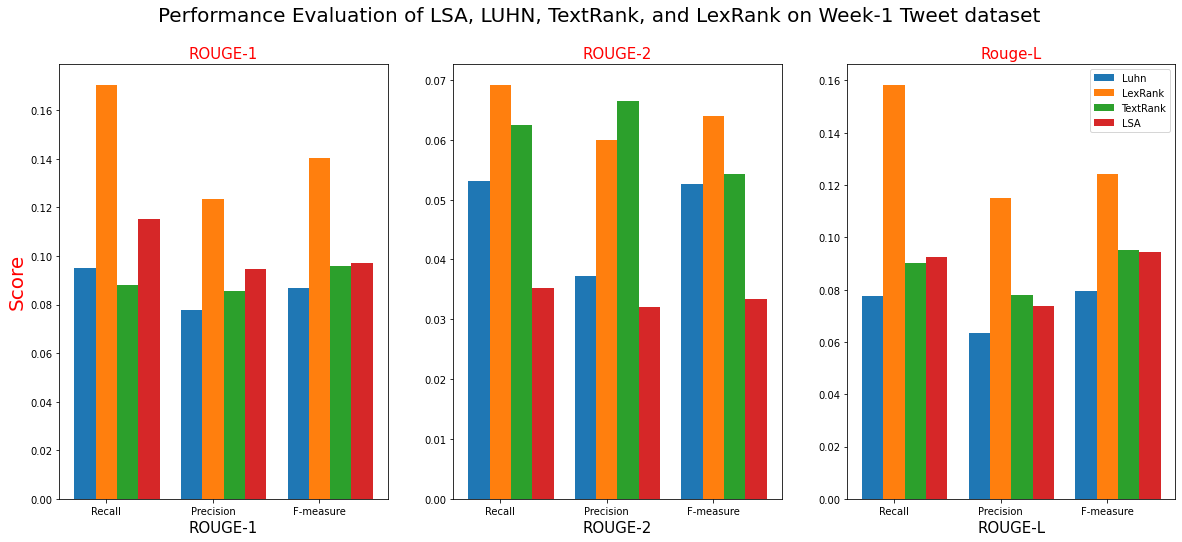

In [ ]:
# for Rouge 1 column
plt.figure(figsize=(20,8))
plt.suptitle("Performance Evaluation of LSA, LUHN, TextRank, and LexRank on Week-1 Tweet dataset",fontsize=20)
plt.subplot(1,3,1)

eval = ['Recall','Precision','F-measure']
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_r1,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_r1,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_r1,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_r1,width = 0.2,label = 'LSA')
plt.ylabel("Score",fontsize=20,color="red")
plt.xlabel("ROUGE-1",fontsize = 15)
plt.title("ROUGE-1",fontsize=15,color="red")

# For Rouge 2 column
plt.subplot(1,3,2)
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_r2,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_r2,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_r2,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_r2,width = 0.2,label = 'LSA')
# plt.legend(loc = 'best',shadow = False)
# plt.ylabel("Score",fontsize=15)
plt.xlabel("ROUGE-2",fontsize = 15)
plt.title("ROUGE-2",fontsize=15,color="red")

# For Rouge L column
plt.subplot(1,3,3)
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_rl,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_rl,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_rl,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_rl,width = 0.2,label = 'LSA')
plt.legend(loc = 'best',shadow = False)
# plt.ylabel("Score",fontsize=15)
plt.xlabel("ROUGE-L",fontsize = 15)
plt.title("Rouge-L",fontsize=15,color="red")

plt.show()



Week 2

In [ ]:
                                            # week 2
eval = ['Rouge_R','Rouge_P','Rouge_F']
luhn_score_r11 = [0.091907,0.07163,0.06707]
lexrank_score_r11 = [0.13536,0.08716,0.10629]
textrank_score_r11 = [0.09162,0.06910,0.08216]
lsa_score_r11 = [0.10463,0.08063,0.07941]

In [ ]:
                                           # week 2
luhn_score_r22 = [0.04913,0.04920,0.06050]
lexrank_score_r22 = [0.04772,0.05742,0.05010]
textrank_score_r22 = [0.047948,0.05335,0.04375]
lsa_score_r22 = [0.05286,0.05969,0.04995]

In [ ]:
                                           # week 2
luhn_score_rll = [0.08827,0.06613,0.06878]
lexrank_score_rll = [0.14003,0.08040,0.0966]
textrank_score_rll = [0.08845, 0.06155,0.06733]
lsa_score_rll = [0.09294,0.06930,0.08293]

In [ ]:
ar=np.arange(len(eval))

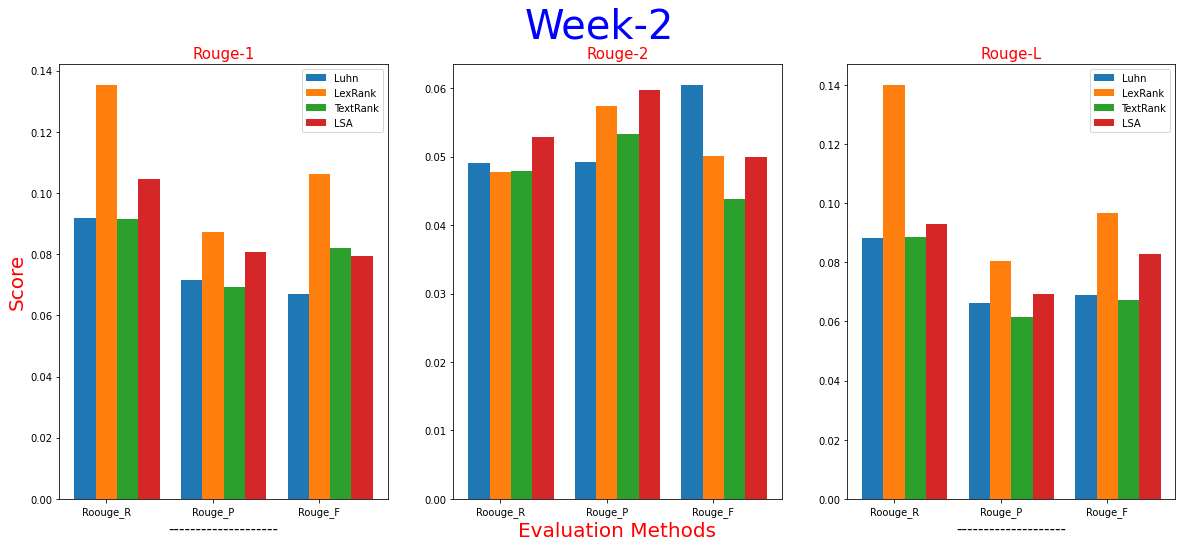

In [ ]:
# for Rouge 1 column
plt.figure(figsize=(20,8))
plt.suptitle("Week-2",fontsize=40,color="blue")
plt.subplot(1,3,1)
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_r11,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_r11,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_r11,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_r11,width = 0.2,label = 'LSA')
plt.legend(loc = 'best',shadow = False)
plt.ylabel("Score",fontsize=20,color="red")
plt.xlabel("--------------------",fontsize = 15)
plt.title("Rouge-1",fontsize=15,color="red")

# For Rouge 2 column
plt.subplot(1,3,2)
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_r22,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_r22,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_r22,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_r22,width = 0.2,label = 'LSA')
# plt.legend(loc = 'best',shadow = False)
# plt.ylabel("Score",fontsize=15)
plt.xlabel("Evaluation Methods",fontsize = 20,color="red")
plt.title("Rouge-2",fontsize=15,color="red")

# For Rouge L column
plt.subplot(1,3,3)
plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_rll,width=0.2,label = 'Luhn')
plt.bar(ar,lexrank_score_rll,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_rll,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_rll,width = 0.2,label = 'LSA')
plt.legend(loc = 'best',shadow = False)
# plt.ylabel("Score",fontsize=15)
plt.xlabel("--------------------",fontsize = 15)
plt.title("Rouge-L",fontsize=15,color="red")

plt.show()



# Tried last night

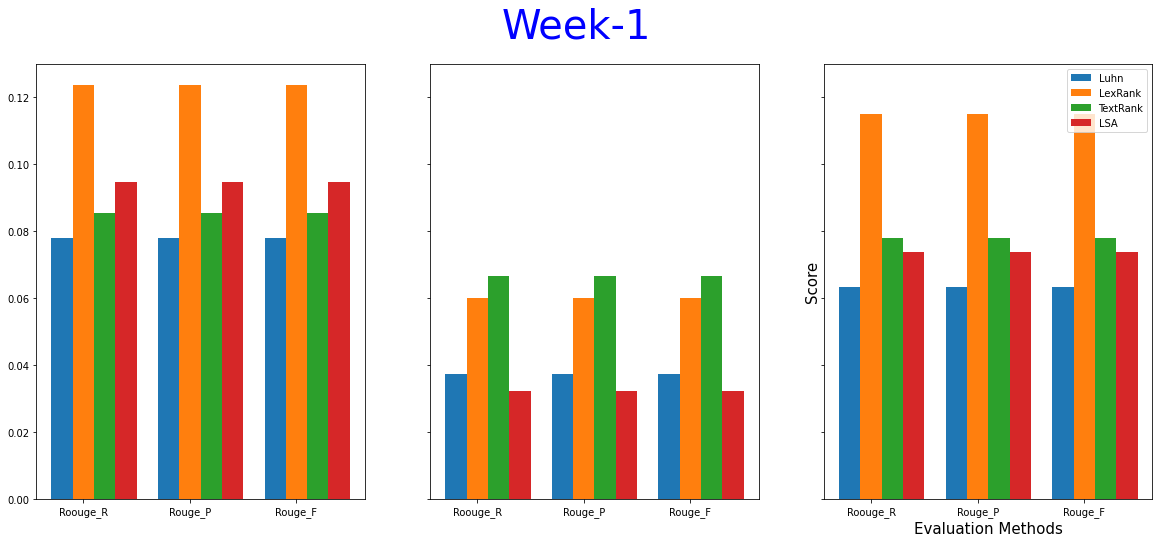

In [ ]:
# for Rouge 1 column

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True)
f.set_size_inches(20,8)
plt.suptitle("Week-1",fontsize=40,color="blue")
#plt.xticks(ar,['rouge-1','rouge-2','rouge-l'])
plt.xlabel("Evaluation Methods",fontsize=15)
plt.ylabel("Score",fontsize=15)

ax1.set_xticks(ar, minor=False)
ax1.set_xticklabels(eval, fontdict=None, minor=False)
ax1.bar(ar-0.2,luhn_score_r1[1],width=0.2,label = 'Luhn')
ax1.bar(ar,lexrank_score_r1[1],width=0.2,label = 'LexRank')
ax1.bar(ar+0.2,textrank_score_r1[1],width=0.2,label = 'TextRank')
ax1.bar(ar+0.4,lsa_score_r1[1],width = 0.2,label = 'LSA')
#ax1.suptitle("")

# For Rouge 2 column
ax2.set_xticks(ar, minor=False)
ax2.set_xticklabels(eval, fontdict=None, minor=False)
ax2.bar(ar-0.2,luhn_score_r2[1],width=0.2,label = 'Luhn')
ax2.bar(ar,lexrank_score_r2[1],width=0.2,label = 'LexRank')
ax2.bar(ar+0.2,textrank_score_r2[1],width=0.2,label = 'TextRank')
ax2.bar(ar+0.4,lsa_score_r2[1],width = 0.2,label = 'LSA')
# ax2.xticks(ar,eval)

# For Rouge L column
ax3.set_xticks(ar, minor=False)
ax3.set_xticklabels(eval, fontdict=None, minor=False)
ax3.bar(ar-0.2,luhn_score_rl[1],width=0.2,label = 'Luhn')
ax3.bar(ar,lexrank_score_rl[1],width=0.2,label = 'LexRank')
ax3.bar(ar+0.2,textrank_score_rl[1],width=0.2,label = 'TextRank')
ax3.bar(ar+0.4,lsa_score_rl[1],width = 0.2,label = 'LSA')
plt.legend()
# ax3.xticks(ar,eval)
plt.show()



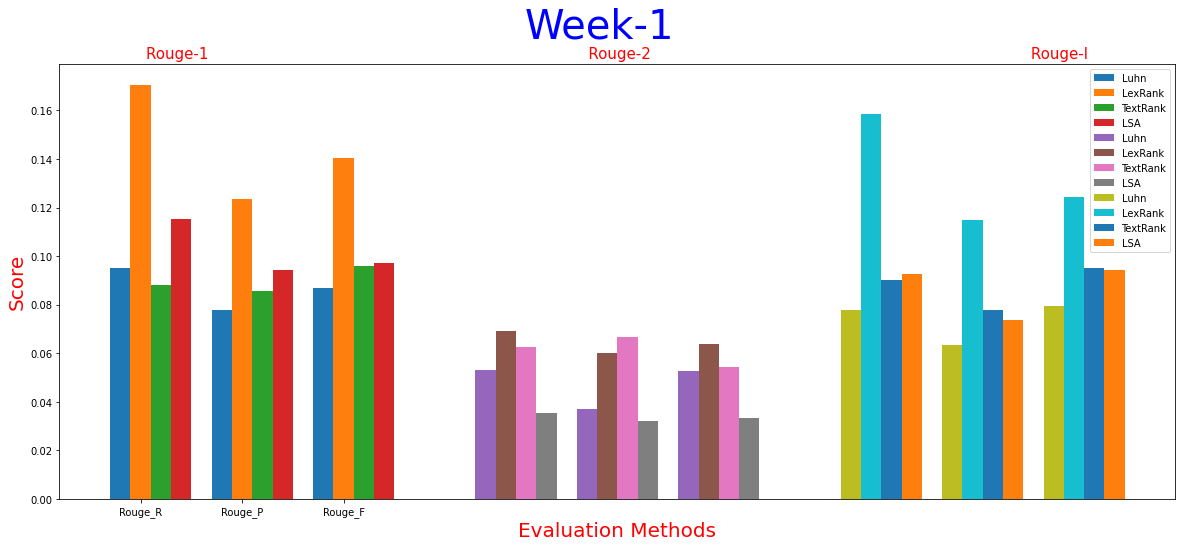

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# week 1
# Rouge 1
luhn_score_r1 = [0.09515,0.07774,0.08668]
lexrank_score_r1 = [0.17061,0.123600,0.14040]
textrank_score_r1 = [0.08796,0.08544,0.09596]
lsa_score_r1 = [0.11513,0.09446,0.09726]

# Rouge 2
luhn_score_r2 = [0.05314,0.03717,0.05263]
lexrank_score_r2 = [0.06922,0.05994,0.06391]
textrank_score_r2 = [0.06244, 0.06653, 0.05421]
lsa_score_r2 = [0.03520,0.03208,0.03339]
                                                #Week 1
# Rouge L
luhn_score_rl = [0.07767, 0.06335,0.07941]
lexrank_score_rl = [0.15840,0.11492, 0.12422]
textrank_score_rl = [0.09021,0.07779,0.09526]
lsa_score_rl = [0.09261,0.07365,0.09436]
eval = ['Rouge_R','Rouge_P','Rouge_F']
#eval = ["Rouge_1_R"+50*" "+"Rouge_1_P"+50*" "+"Rouge_1_F",
        #"Rouge_2_R"+50*" "+"Rouge_2_P"+50*" "+"Rouge_L_F",
        #"Rouge_3_R"+50*" "+"Rouge_3_P"+50*" "+"Rouge_L_F"]
ar=np.arange(len(eval))

# for Rouge 1 column
plt.figure(figsize=(20,8))
plt.suptitle("Week-1",fontsize=40,color="blue")

plt.xticks(ar,eval)
plt.bar(ar-0.2,luhn_score_r1,width=0.2,label = 'Luhn', )
plt.bar(ar,lexrank_score_r1,width=0.2,label = 'LexRank')
plt.bar(ar+0.2,textrank_score_r1,width=0.2,label = 'TextRank')
plt.bar(ar+0.4,lsa_score_r1,width = 0.2,label = 'LSA')

# For Rouge 2 column
plt.bar(ar+3.4,luhn_score_r2,width=0.2,label = 'Luhn')
plt.bar(ar+3.6,lexrank_score_r2,width=0.2,label = 'LexRank')
plt.bar(ar+3.8,textrank_score_r2,width=0.2,label = 'TextRank')
plt.bar(ar+4,lsa_score_r2,width = 0.2,label = 'LSA')

# For Rouge L column
plt.bar(ar+7,luhn_score_rl,width=0.2,label = 'Luhn')
plt.bar(ar+7.2,lexrank_score_rl,width=0.2,label = 'LexRank')
plt.bar(ar+7.4,textrank_score_rl,width=0.2,label = 'TextRank')
plt.bar(ar+7.6,lsa_score_rl,width = 0.2,label = 'LSA')
plt.legend(loc = 'best',shadow = False)
plt.xlabel("Evaluation Methods",fontsize = 20,color="red")
plt.ylabel("Score",fontsize=20,color="red")
plt.title("Rouge-1"+80*" "+"Rouge-2"+80*" "+"Rouge-l",fontsize=15,color="red")

plt.show()



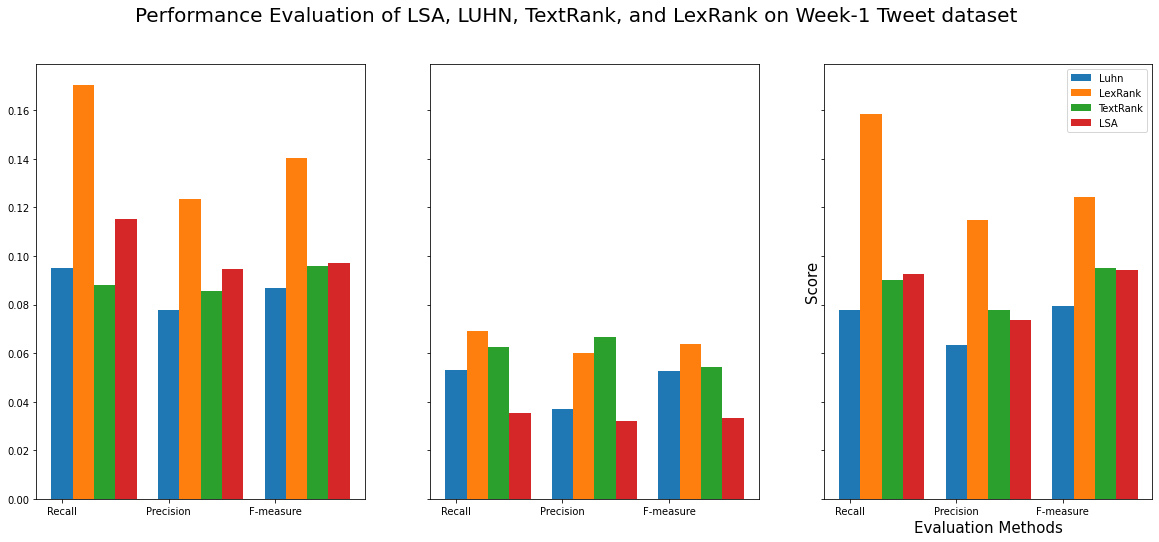

In [ ]:
# for Rouge 1 column

f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True)
f.set_size_inches(20,8)
plt.suptitle("Performance Evaluation of LSA, LUHN, TextRank, and LexRank on Week-1 Tweet dataset",fontsize=20)
plt.xlabel("Evaluation Methods",fontsize=15)
plt.ylabel("Score",fontsize=15)

eval = ['Recall','Precision','F-measure']
ar=np.arange(len(eval))
plt.xticks(ar)

# For Rouge 1 column
ax1.bar(ar-0.2,luhn_score_r1,width=0.2,label = 'Luhn', tick_label=eval)
ax1.bar(ar,lexrank_score_r1,width=0.2,label = 'LexRank')
ax1.bar(ar+0.2,textrank_score_r1,width=0.2,label = 'TextRank')
ax1.bar(ar+0.4,lsa_score_r1,width = 0.2,label = 'LSA')
#ax1.title("ROUGE-1",fontsize=15,color="red")

# For Rouge 2 column
ax2.bar(ar-0.2,luhn_score_r2,width=0.2,label = 'Luhn')
ax2.bar(ar,lexrank_score_r2,width=0.2,label = 'LexRank')
ax2.bar(ar+0.2,textrank_score_r2,width=0.2,label = 'TextRank')
ax2.bar(ar+0.4,lsa_score_r2,width = 0.2,label = 'LSA')
#ax2.title("ROUGE-2",fontsize=15,color="red")

# For Rouge L column
ax3.bar(ar-0.2,luhn_score_rl,width=0.2,label = 'Luhn')
ax3.bar(ar,lexrank_score_rl,width=0.2,label = 'LexRank')
ax3.bar(ar+0.2,textrank_score_rl,width=0.2,label = 'TextRank')
ax3.bar(ar+0.4,lsa_score_rl,width = 0.2,label = 'LSA')
ax3.legend(loc = 'best',shadow = False)
#ax3.title("Rouge-L",fontsize=15,color="red")

plt.show()